In [1]:
import numpy as np
import json
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.fftpack import idct, dct

from uncond_ts_diff.custom_dataset import get_custom_dataset

In [2]:
from gbm import estimate_parameters

In [3]:
plt.style.use('seaborn')

/tmp/ipykernel_3683949/240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
def plot_gbm(St, n, M, dt):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel("Years $(t)$")
    plt.ylabel("Stock Price $(S_t)$")
    plt.show()

def plot_freq(St, n, M, dt):
    time = np.linspace(0, n * dt, St.shape[0])
    tt = np.full(shape=(M, St.shape[0]), fill_value=time).T
    plt.plot(tt, St)
    plt.xlabel("Frequency $(f)$")
    plt.ylabel("Magnitude")
    plt.show()


In [6]:

# for i in range(nums_of_datasets):
#     gbm_path = f'../results/{EXP_NAME}/generation_log-{i}/'
#     data_path = gbm_path
#     real = np.load(data_path + 'real_samples.npy').T
#     synth = np.load(data_path + 'synth_samples.npy').T
    

#     plot_gbm(real, real.shape[0], real.shape[1], 1/n)
#     plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)
    
#     real_params = estimate_parameters(real, 1/n, ret_distribution=True)
#     synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)
    
#     # Create a new figure for the KDE plots of sigma
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(real_params[0], label='Real sigma', fill=True)
#     sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
#     plt.title('KDE of Sigma')
#     plt.xlabel('Sigma')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

#     # Create a new figure for the KDE plots of mu
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(real_params[1], label='Real mu', fill=True)
#     sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
#     plt.title('KDE of Mu')
#     plt.xlabel('Mu')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

#     print('-' * 100)
    
    


In [7]:

# for i in range(nums_of_datasets):
#     gbm_path = f'../results/cos_exp1/generation_log-{i}/'
#     data_path = gbm_path
#     real = np.load(data_path + 'real_samples.npy').T
#     synth = np.load(data_path + 'synth_samples.npy').T
    

#     plot_gbm(real, real.shape[0], real.shape[1], 1/n)

#     transformed_real = dct(real, axis=0, norm='ortho')
#     plot_freq(transformed_real, transformed_real.shape[0], transformed_real.shape[1], 1/n)
    
#     plot_freq(synth, synth.shape[0], synth.shape[1], 1/n)
#     recovered_synth = idct(synth, axis=0, norm='ortho')
#     plot_gbm(recovered_synth, recovered_synth.shape[0], recovered_synth.shape[1], 1/n)
    
#     real_params = estimate_parameters(real, 1/n, ret_distribution=True)
#     synth_params = estimate_parameters(recovered_synth, 1/n, ret_distribution=True)
    
#     # Create a new figure for the KDE plots of sigma
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(real_params[0], label='Real sigma', fill=True)
#     sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
#     plt.title('KDE of Sigma')
#     plt.xlabel('Sigma')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

#     # Create a new figure for the KDE plots of mu
#     plt.figure(figsize=(10, 6))
#     sns.kdeplot(real_params[1], label='Real mu', fill=True)
#     sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
#     plt.title('KDE of Mu')
#     plt.xlabel('Mu')
#     plt.ylabel('Density')
#     plt.legend()
#     plt.show()

#     print('-' * 100)
    
    
    
#     print('-'*100)

    


size:  (199, 10000)


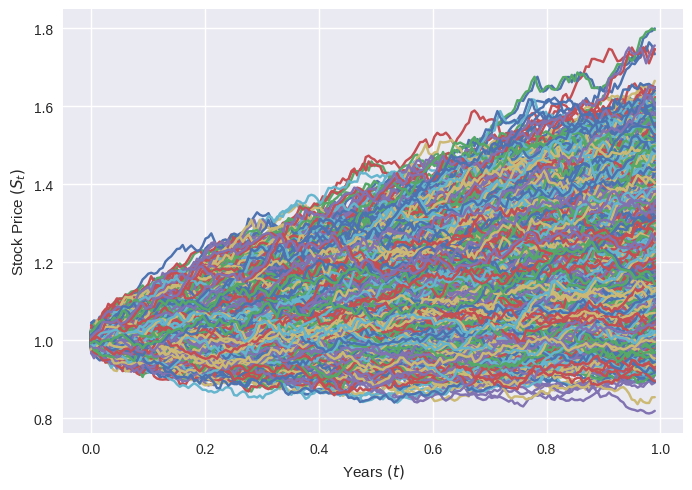

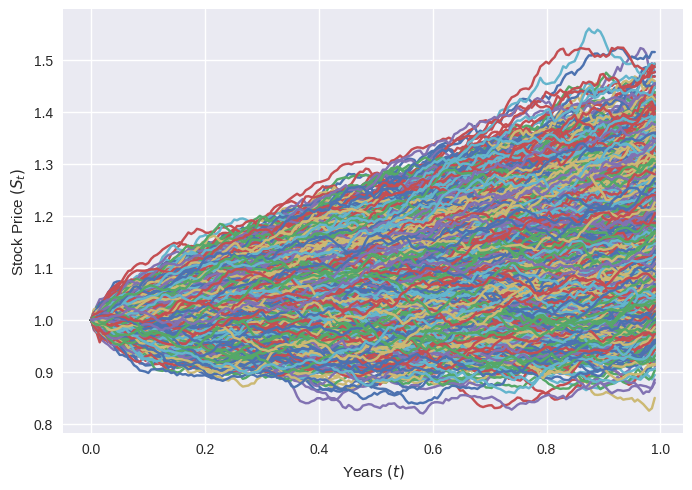

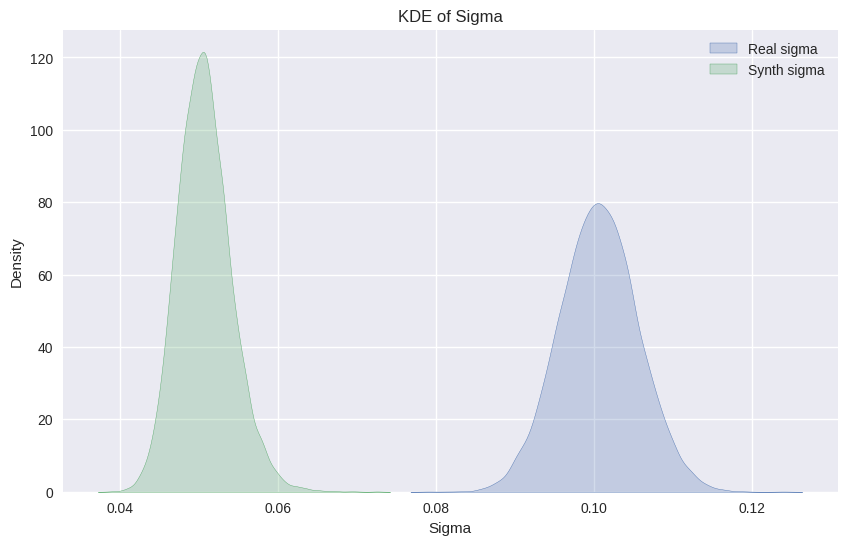

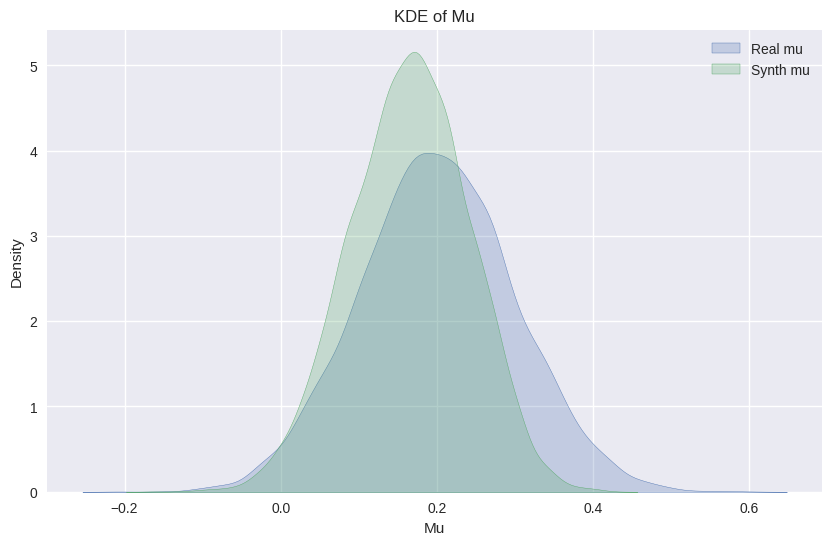

----------------------------------------------------------------------------------------------------
size:  (199, 10000)


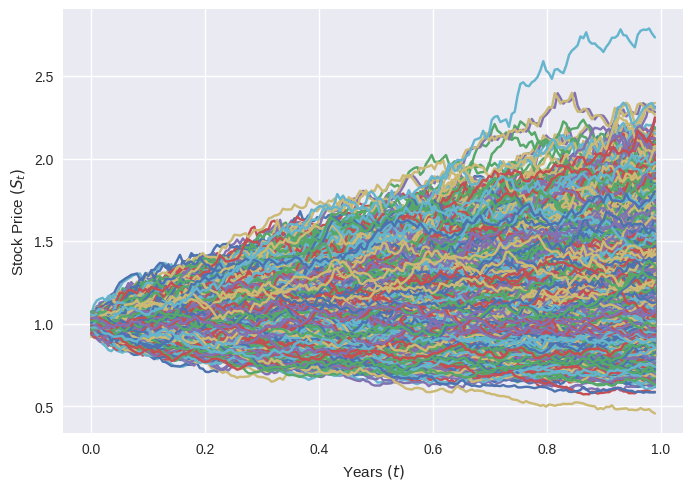

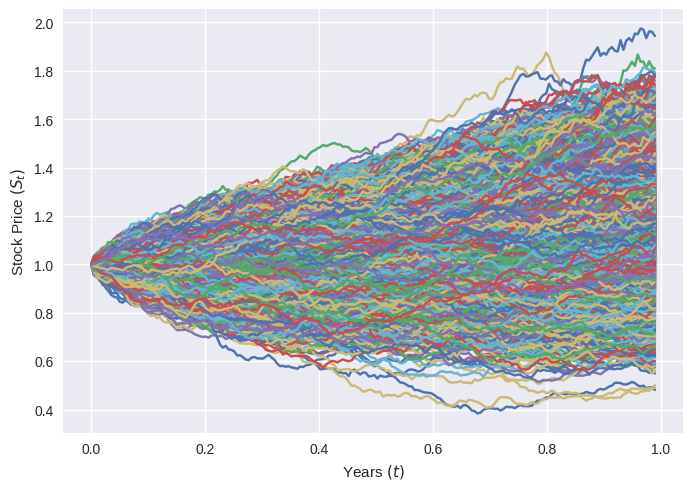

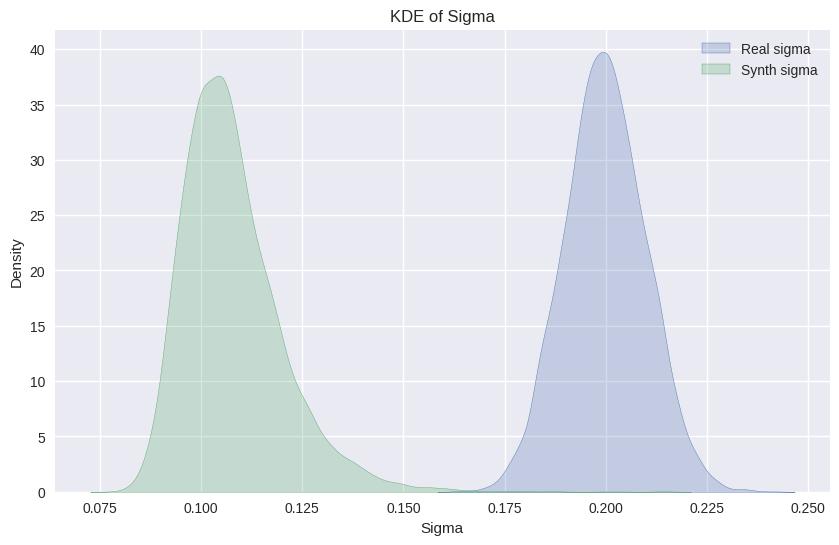

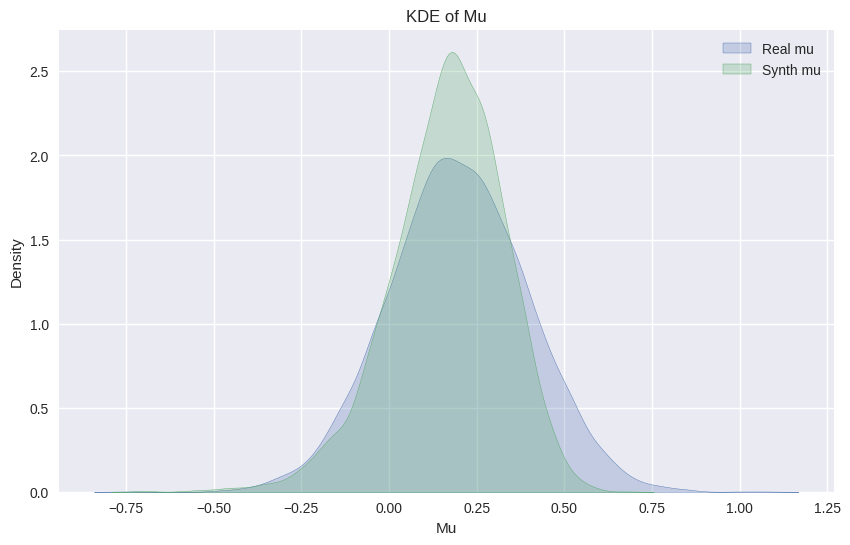

----------------------------------------------------------------------------------------------------


In [24]:
prediction_length = 1
n = 200
nums_of_datasets = 2
EXP_NAME = 'exp6'



for i in range(nums_of_datasets):
    gbm_path = f'../results/{EXP_NAME}/generation_log-{i}/'
    data_path = gbm_path
    real = np.load(data_path + 'real_samples.npy').T
    synth = np.load(data_path + 'synth_samples.npy').T
    dataset = get_custom_dataset(f"../data/{EXP_NAME}/gbm-{i}.jsonl", 'D', prediction_length)
    st = np.array([item['target'] for item in list(dataset.train)]).T
    st_params = estimate_parameters(st, 1/n, ret_distribution=True)
    print('size: ', st.shape)
    
    synth = synth + 1 - synth[0, :]
    plot_gbm(real, real.shape[0], real.shape[1], 1/n)
    plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)
    
    real_params = estimate_parameters(real, 1/n, ret_distribution=True)
    synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)
    
    # Create a new figure for the KDE plots of sigma
    plt.figure(figsize=(10, 6))
    sns.kdeplot(st_params[0], label='Real sigma', fill=True)
    sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
    # sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True)
    plt.title('KDE of Sigma')
    plt.xlabel('Sigma')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Create a new figure for the KDE plots of mu
    plt.figure(figsize=(10, 6))
    sns.kdeplot(st_params[1], label='Real mu', fill=True)
    sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
    # sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True)
    plt.title('KDE of Mu')
    plt.xlabel('Mu')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    print('-' * 100)
    
    
    

    


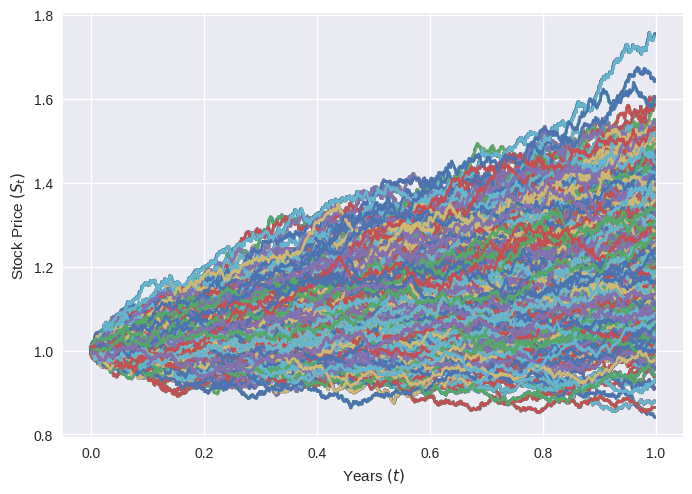

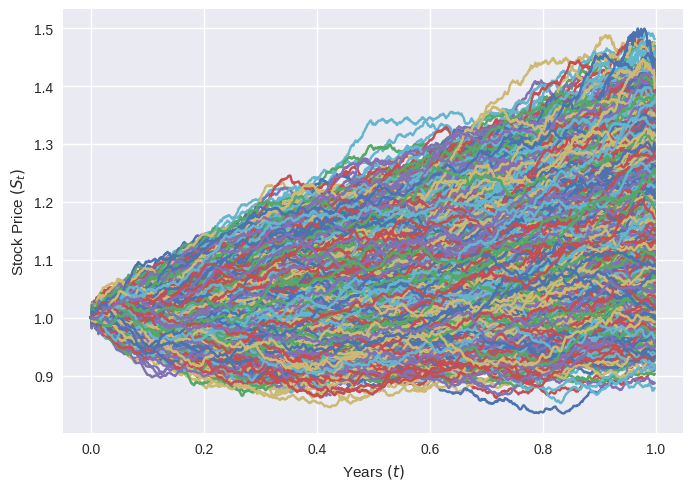

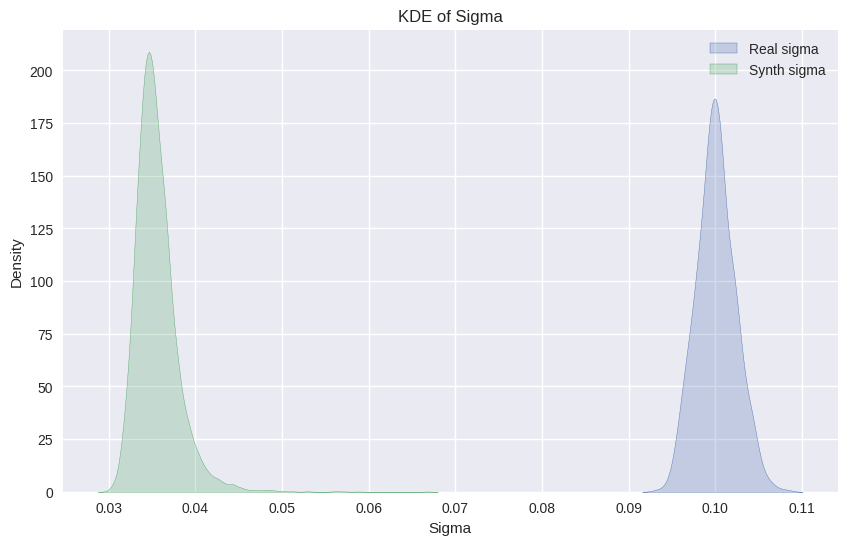

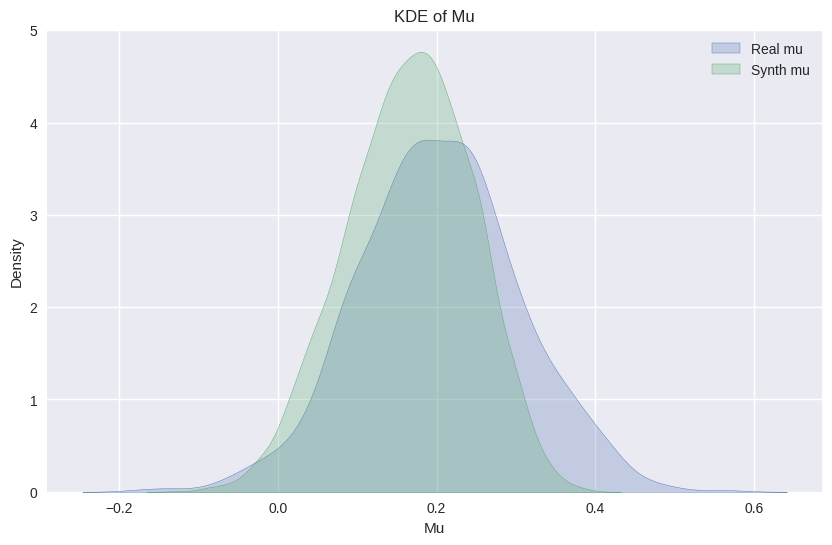

----------------------------------------------------------------------------------------------------


In [19]:
prediction_length = 1
n = 1000
EXP_NAME = 'exp4-2'


i = 0
gbm_path = f'../results/{EXP_NAME}/generation_log-{i}/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
dataset = get_custom_dataset(f"../data/{EXP_NAME}/gbm-{i}.jsonl", 'D', prediction_length)
st = np.array([item['target'] for item in list(dataset.train)]).T
st_params = estimate_parameters(st, 1/n, ret_distribution=True)

synth = synth + 1 - synth[0, :]
plot_gbm(real, real.shape[0], real.shape[1], 1/n)
plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)

real_params = estimate_parameters(real, 1/n, ret_distribution=True)
synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)

# Create a new figure for the KDE plots of sigma
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[0], label='Real sigma', fill=True)
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
# sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True)
plt.title('KDE of Sigma')
plt.xlabel('Sigma')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create a new figure for the KDE plots of mu
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[1], label='Real mu', fill=True)
sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
# sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True)
plt.title('KDE of Mu')
plt.xlabel('Mu')
plt.ylabel('Density')
plt.legend()
plt.show()

print('-' * 100)

In [14]:
synth.shape

(198, 10000)

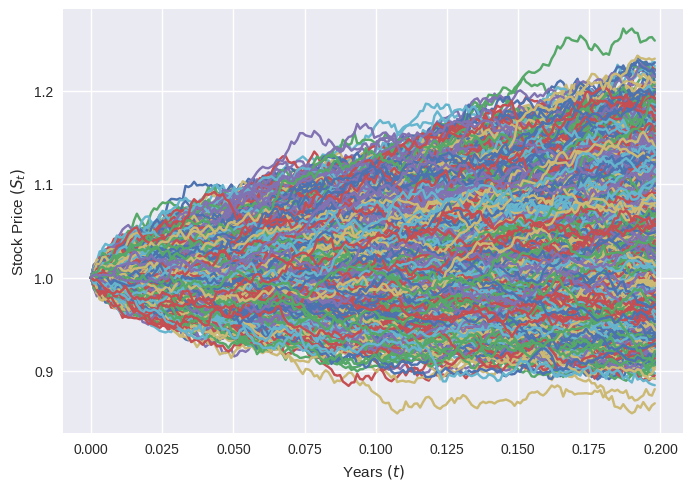

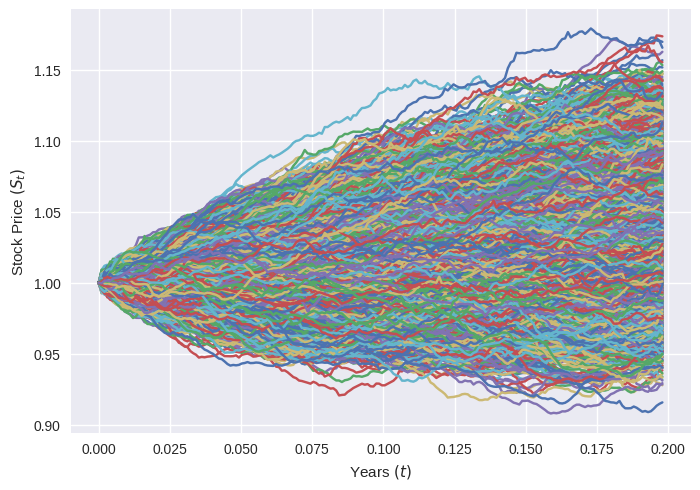

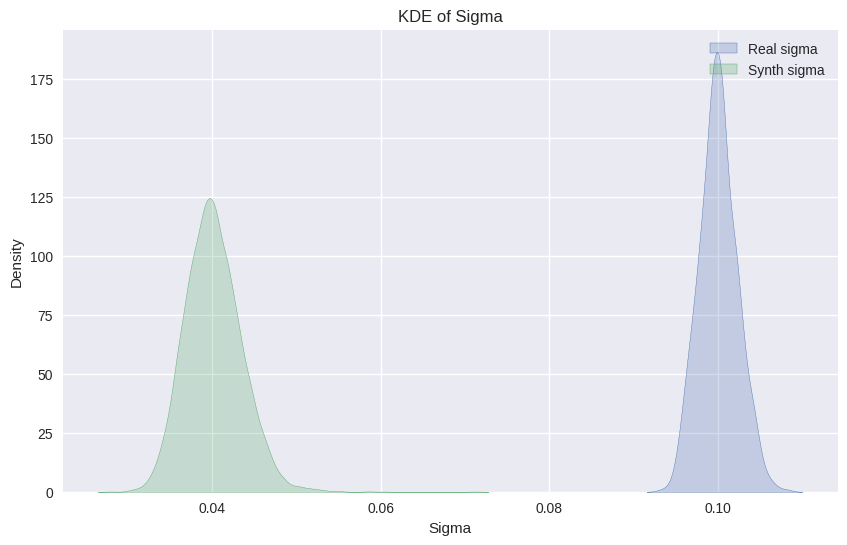

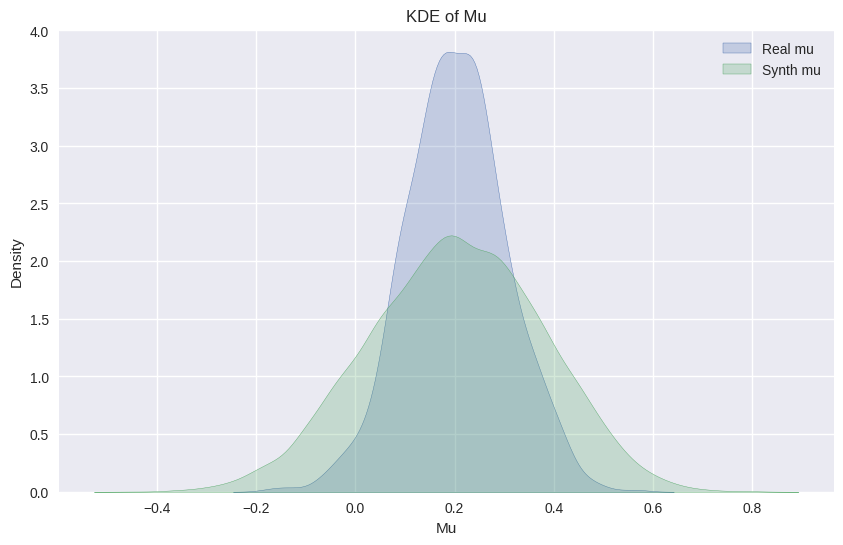

----------------------------------------------------------------------------------------------------


In [23]:
prediction_length = 1
n = 1000
EXP_NAME = 'exp5'


i = 0
gbm_path = f'../results/{EXP_NAME}/generation_log-{i}/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
dataset = get_custom_dataset(f"../data/{EXP_NAME}/gbm-{i}.jsonl", 'D', prediction_length)
st = np.array([item['target'] for item in list(dataset.train)]).T
st_params = estimate_parameters(st, 1/n, ret_distribution=True)

synth = synth + 1 - synth[0, :]
real = real + 1 - real[0, :]
plot_gbm(real, real.shape[0], real.shape[1], 1/n)
plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)

real_params = estimate_parameters(real, 1/n, ret_distribution=True)
synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)

# Create a new figure for the KDE plots of sigma
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[0], label='Real sigma', fill=True)
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
# sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True)
plt.title('KDE of Sigma')
plt.xlabel('Sigma')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create a new figure for the KDE plots of mu
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[1], label='Real mu', fill=True)
sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
# sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True)
plt.title('KDE of Mu')
plt.xlabel('Mu')
plt.ylabel('Density')
plt.legend()
plt.show()

print('-' * 100)

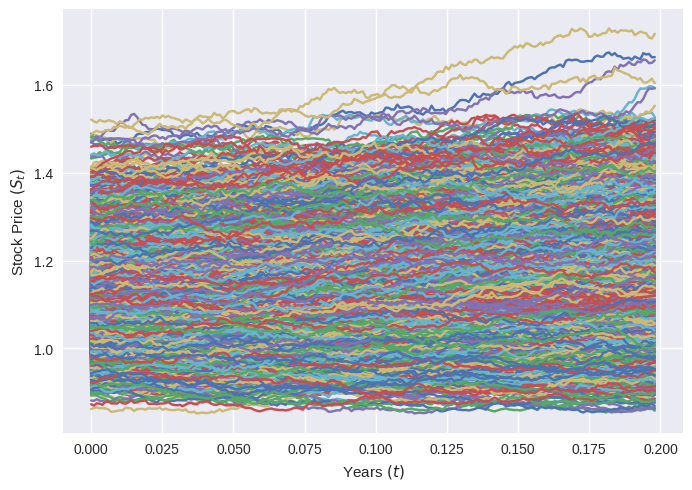

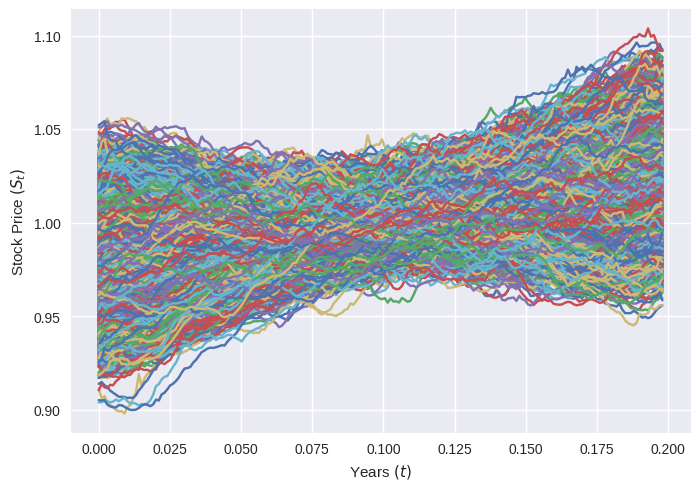

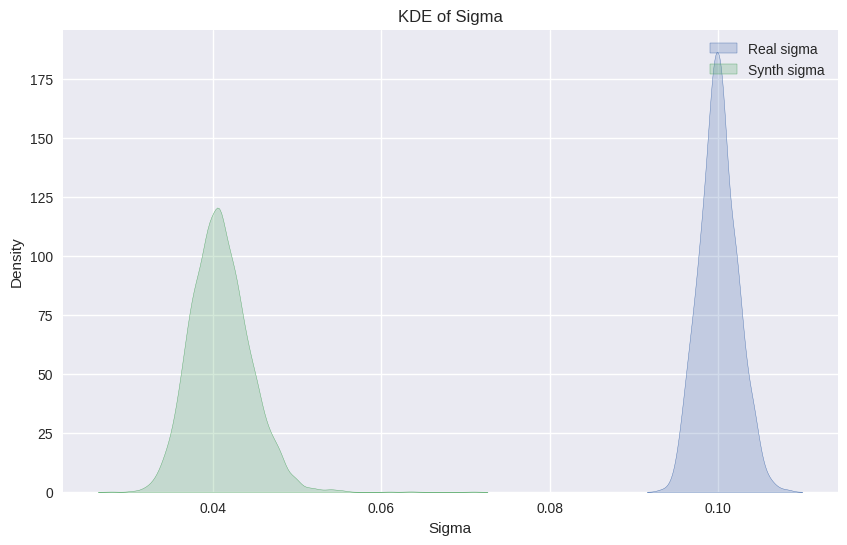

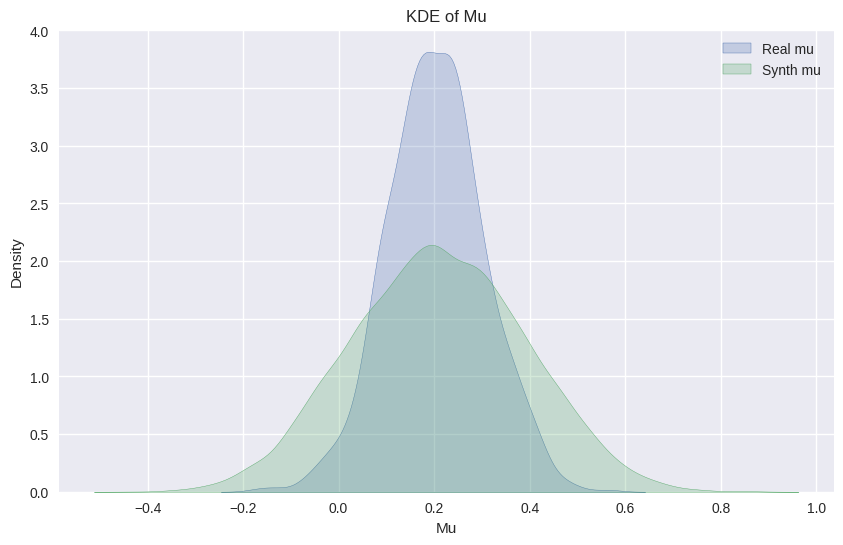

----------------------------------------------------------------------------------------------------


In [11]:
prediction_length = 1
n = 1000
nums_of_datasets = 9
EXP_NAME = 'exp5'


i = 0
gbm_path = f'../results/{EXP_NAME}/generation_log-{i}/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
dataset = get_custom_dataset(f"../data/{EXP_NAME}/gbm-{i}.jsonl", 'D', prediction_length)
st = np.array([item['target'] for item in list(dataset.train)]).T
st_params = estimate_parameters(st, 1/n, ret_distribution=True)


plot_gbm(real, real.shape[0], real.shape[1], 1/n)
plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)

real_params = estimate_parameters(real, 1/n, ret_distribution=True)
synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)

# Create a new figure for the KDE plots of sigma
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[0], label='Real sigma', fill=True)
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
# sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True)
plt.title('KDE of Sigma')
plt.xlabel('Sigma')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create a new figure for the KDE plots of mu
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[1], label='Real mu', fill=True)
sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
# sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True)
plt.title('KDE of Mu')
plt.xlabel('Mu')
plt.ylabel('Density')
plt.legend()
plt.show()

print('-' * 100)

In [12]:

i = 7
gbm_path = f'../results/{EXP_NAME}/generation_log-{i}/'
data_path = gbm_path
real = np.load(data_path + 'real_samples.npy').T
synth = np.load(data_path + 'synth_samples.npy').T
dataset = get_custom_dataset(f"../data/{EXP_NAME}/gbm-{i}.jsonl", 'D', prediction_length)
st = np.array([item['target'] for item in list(dataset.train)]).T
st_params = estimate_parameters(st, 1/n, ret_distribution=True)


plot_gbm(real, real.shape[0], real.shape[1], 1/n)
plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)

real_params = estimate_parameters(real, 1/n, ret_distribution=True)
synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)

# Create a new figure for the KDE plots of sigma
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[0], label='Real sigma', fill=True)
sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
# sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True)
plt.title('KDE of Sigma')
plt.xlabel('Sigma')
plt.ylabel('Density')
plt.legend()
plt.show()

# Create a new figure for the KDE plots of mu
plt.figure(figsize=(10, 6))
sns.kdeplot(st_params[1], label='Real mu', fill=True)
sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
# sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True)
plt.title('KDE of Mu')
plt.xlabel('Mu')
plt.ylabel('Density')
plt.legend()
plt.show()

print('-' * 100)

FileNotFoundError: [Errno 2] No such file or directory: '../results/exp5/generation_log-7/real_samples.npy'

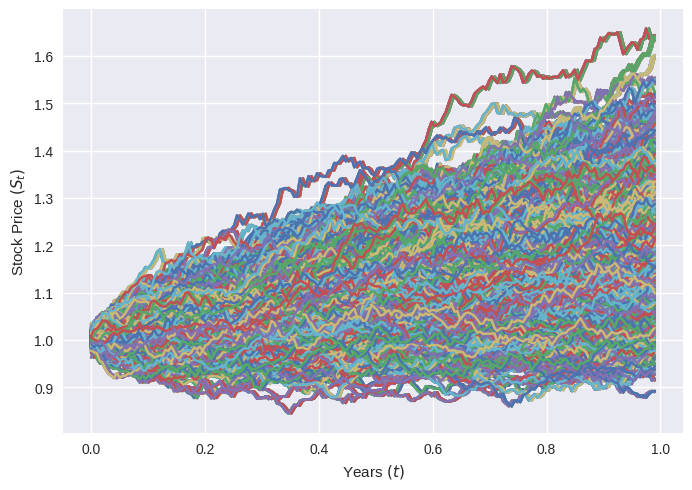

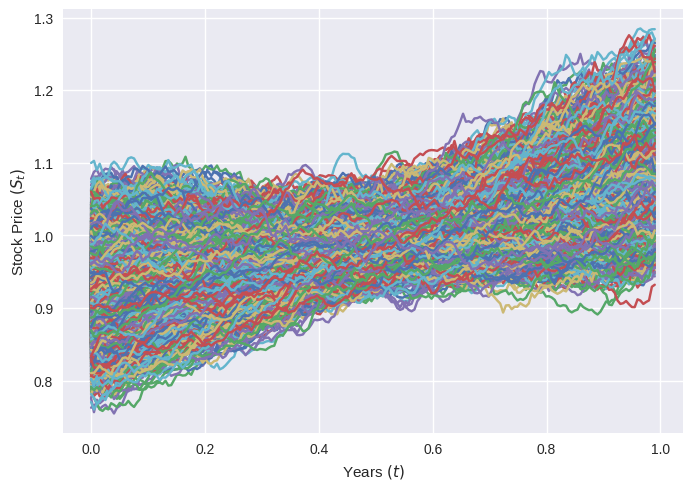

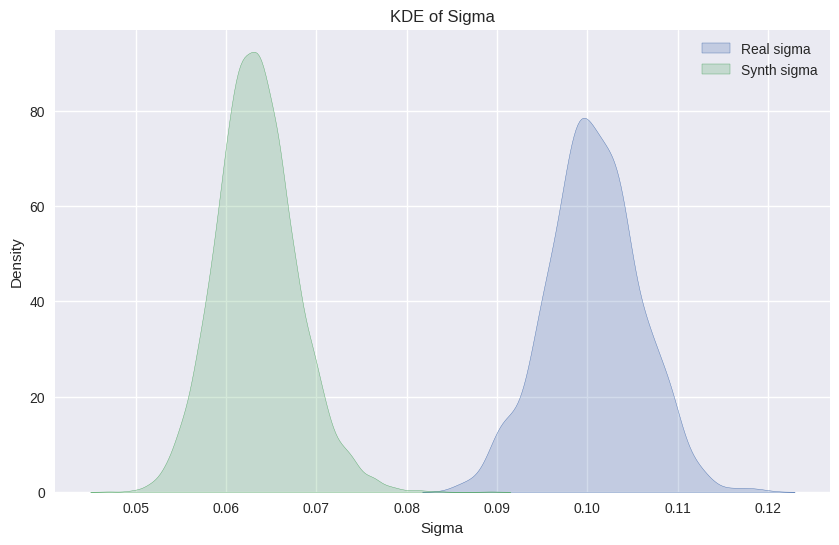

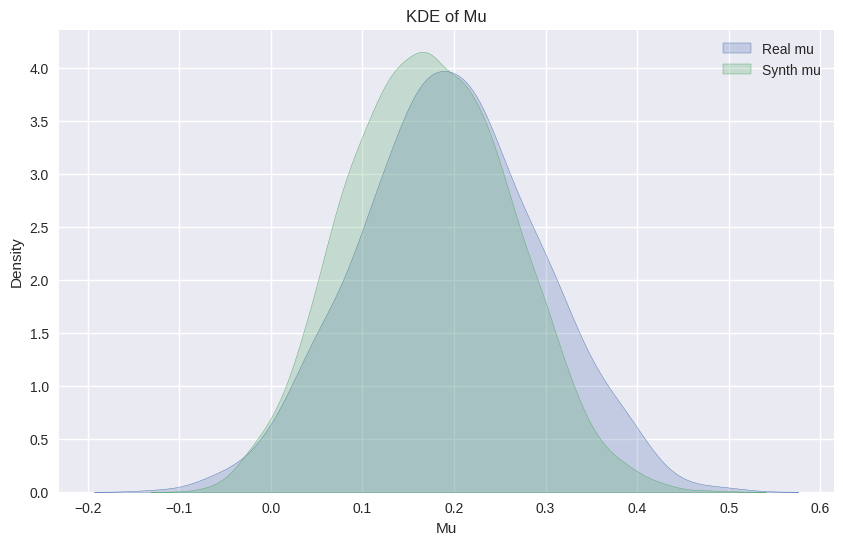

----------------------------------------------------------------------------------------------------


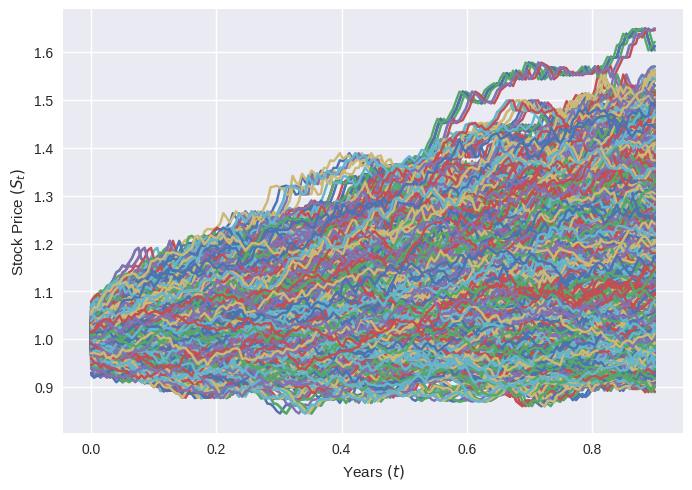

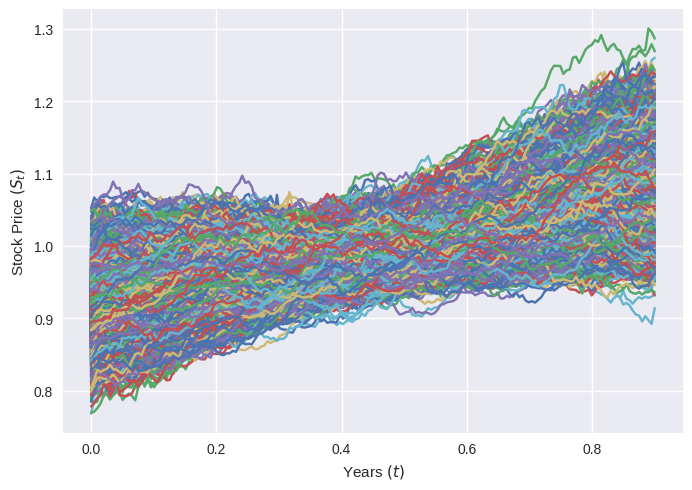

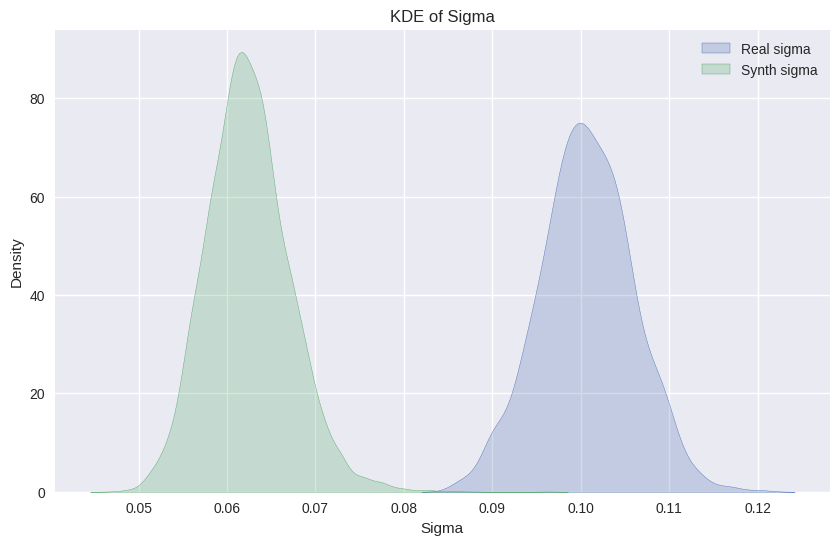

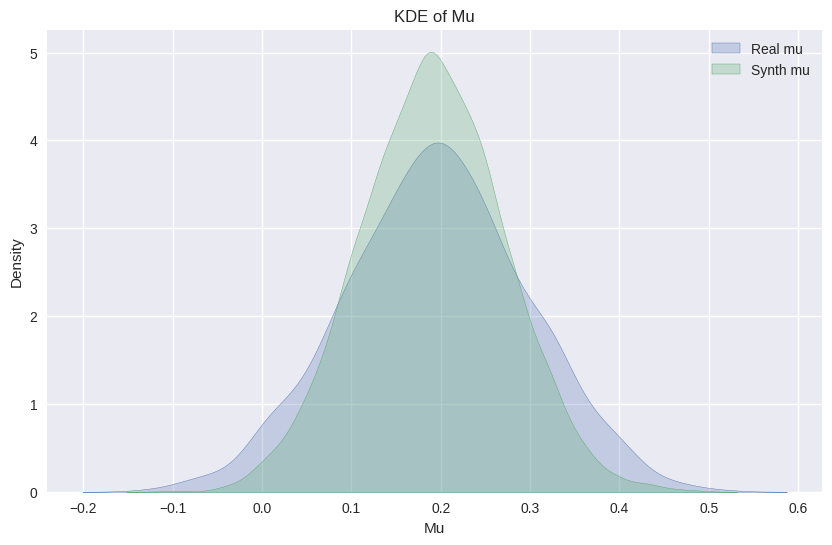

----------------------------------------------------------------------------------------------------


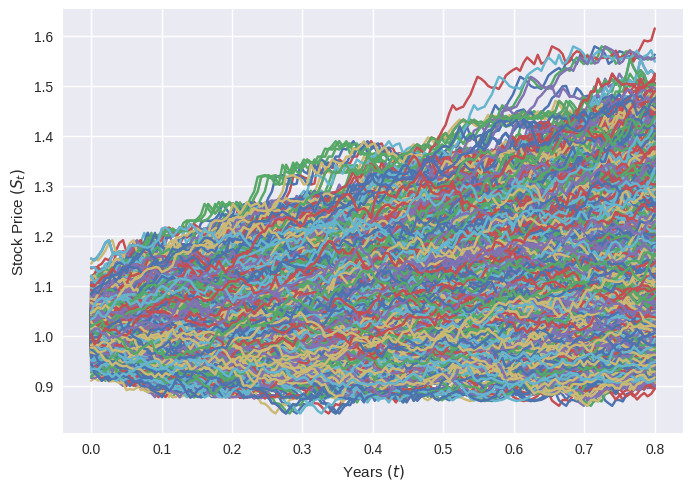

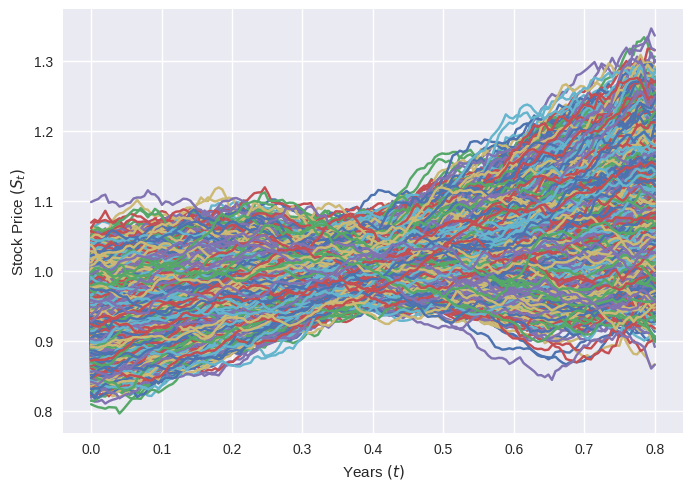

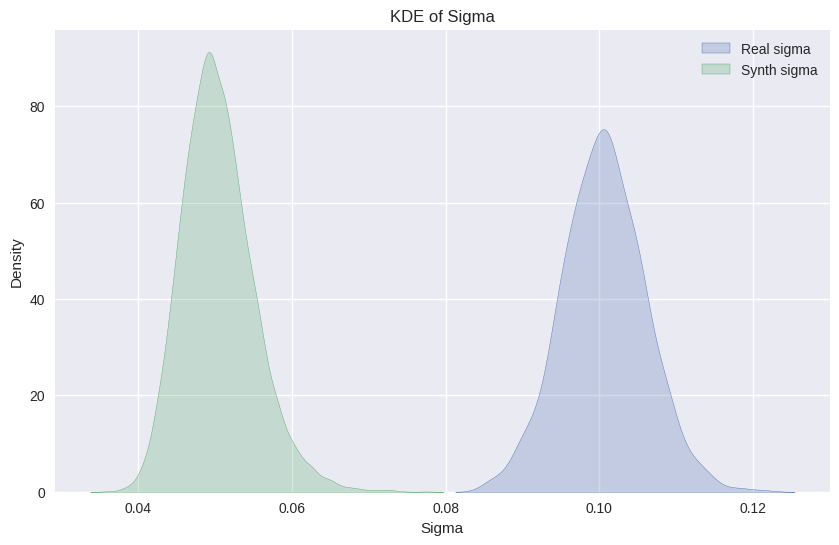

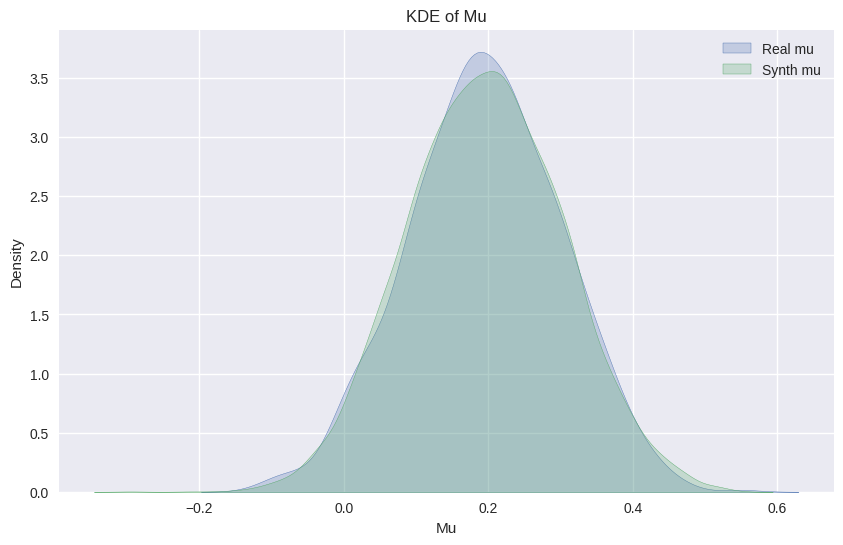

----------------------------------------------------------------------------------------------------


In [ ]:

pred_lengths = [1, 10, 20]

for i in range(1, 4):
    gbm_path = f'../results/exp3-{i}/generation_log-0/'
    data_path = gbm_path
    real = np.load(data_path + 'real_samples.npy').T
    synth = np.load(data_path + 'synth_samples.npy').T
    dataset = get_custom_dataset(f"../data/exp3-{i}/gbm-0.jsonl", 'D', pred_lengths[i-1])
    st = np.array([item['target'] for item in list(dataset.train)]).T
    st_params = estimate_parameters(st, 1/n, ret_distribution=True)
    

    plot_gbm(real, real.shape[0], real.shape[1], 1/n)
    plot_gbm(synth, synth.shape[0], synth.shape[1], 1/n)
    
    real_params = estimate_parameters(real, 1/n, ret_distribution=True)
    synth_params = estimate_parameters(synth, 1/n, ret_distribution=True)
    
    # Create a new figure for the KDE plots of sigma
    plt.figure(figsize=(10, 6))
    sns.kdeplot(st_params[0], label='Real sigma', fill=True)
    sns.kdeplot(synth_params[0], label='Synth sigma', fill=True)
    # sns.kdeplot(real_params[0], label='Real(sampled) sigma', fill=True)
    plt.title('KDE of Sigma')
    plt.xlabel('Sigma')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # Create a new figure for the KDE plots of mu
    plt.figure(figsize=(10, 6))
    sns.kdeplot(st_params[1], label='Real mu', fill=True)
    sns.kdeplot(synth_params[1], label='Synth mu', fill=True)
    # sns.kdeplot(real_params[1], label='Real(sampled) mu', fill=True)
    plt.title('KDE of Mu')
    plt.xlabel('Mu')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    print('-' * 100)
    
    
    

    
